In [2]:
import matplotlib.pyplot as plt
import numpy as np

def read_split_time_est(file):
    exp_t_mle = []
    exp_t_se = []
    twoIsland_t_mle = []
    twoIsland_t_se = []
    with open(file) as f:
        for line in f:
            if line.startswith('#'):
                continue
            else:
                _, t_exp_mle, t_exp_se, t_2island_mle, t_2island_se, *_ = line.strip().split()
                exp_t_mle.append(float(t_exp_mle))
                exp_t_se.append(float(t_exp_se))
                twoIsland_t_mle.append(float(t_2island_mle))
                twoIsland_t_se.append(float(t_2island_se))

    exp_t_mle, exp_t_se, twoIsland_t_mle, twoIsland_t_se = np.array(exp_t_mle), np.array(exp_t_se), np.array(twoIsland_t_mle), np.array(twoIsland_t_se)
    sortedIndex = np.argsort(exp_t_mle)
    exp_t_mle, exp_t_se = exp_t_mle[sortedIndex], exp_t_se[sortedIndex]
    sortedIndex = np.argsort(twoIsland_t_mle)
    twoIsland_t_mle, twoIsland_t_se = twoIsland_t_mle[sortedIndex], twoIsland_t_se[sortedIndex]
    return exp_t_mle, exp_t_se, twoIsland_t_mle, twoIsland_t_se

def read_ne_est(file):
    ne_list = []
    ne_se_list = []
    with open(file) as f:
        for line in f:
            if line.startswith('#'):
                continue
            else:
                _, _, _, _, _, ne, ne_se = line.strip().split()
                ne_list.append(float(ne))
                ne_se_list.append(float(ne_se))
    ne_list, ne_se_list = np.array(ne_list), np.array(ne_se_list)
    print(f'{file}: {np.mean(ne_list)}')
    sortedIndex = np.argsort(ne_list)
    ne_list, ne_se_list = ne_list[sortedIndex], ne_se_list[sortedIndex] 
    return ne_list, ne_se_list

In [ ]:
for T in [20, 30, 50]:
    global_start = 2.5
    for i, Ne in enumerate([50, 100, 250, 500, 1000, 2000]):
        exp_t_mle, exp_t_se, twoIsland_t_mle, twoIsland_t_se = read_split_time_est(f'./results/T{T}_N{Ne}_end1000_fullARG.results')
        local_start = global_start + 12.5*i

        xs_2island = np.linspace(local_start, local_start+2.5, num=len(twoIsland_t_mle))
        if i > 0:
            plt.scatter(xs_2island, twoIsland_t_mle, marker='o', c='blue', s=5, zorder=3)
            plt.errorbar(xs_2island, twoIsland_t_mle, yerr=1.96*np.array(twoIsland_t_se), fmt='none', ecolor='#8c8c8c', zorder=1)
        else:
            plt.scatter(xs_2island, twoIsland_t_mle, marker='o', c='blue', s=5, zorder=3, label='Two-Island')
            plt.errorbar(xs_2island, twoIsland_t_mle, yerr=1.96*np.array(twoIsland_t_se), fmt='none', ecolor='#8c8c8c', zorder=1, label='95% Confidence Interval')

        xs_exp = np.linspace(local_start+5, local_start+7.5, num=len(exp_t_mle))
        if i > 0:
            plt.scatter(xs_exp, exp_t_mle, marker='o', c='#f58a42', s=5, zorder=3)
        else:
            plt.scatter(xs_exp, exp_t_mle, marker='o', c='#f58a42', s=5, zorder=3, label='Exponential Fit')
        plt.errorbar(xs_exp, exp_t_mle, yerr=1.96*np.array(exp_t_se), fmt='none', ecolor='#8c8c8c', zorder=1)

        print(f'####### T: {T}, Ne: {Ne} ##########')
        print(f'bias of our estimator: {np.mean(twoIsland_t_mle - T)}')
        print(f'bias of their estimator: {np.mean(exp_t_mle - T)}')

    plt.xlabel('Ancestral Population Size($N_0$)', fontsize=14)
    plt.ylabel('Estimated Split Time($T_0$)', fontsize=14)
    plt.title(f'Simulated $T_0$: {T}', fontsize=14)
    plt.xticks([6.25, 18.75, 31.25, 43.75, 56.25, 68.75], ['50', '100', '250', '500', '1000', '2000'])
    plt.axhline(y=T, xmin=0, xmax=1, zorder=2, c='red', linestyle='-', label="True split time")
    plt.legend(loc='upper left', fontsize='x-small')
    plt.savefig(f'T{T}_multiStart.png', dpi=300)
    plt.savefig(f'T{T}_multiStart.pdf')
    plt.clf()

# plot as suggested by david

####### T: 20, Ne: 50 ##########
bias of our estimator: 0.6584800000000002
bias of their estimator: 10.143040000000001
####### T: 20, Ne: 100 ##########
bias of our estimator: 0.6305399999999999
bias of their estimator: 10.581859999999999
####### T: 20, Ne: 250 ##########
bias of our estimator: 0.6194600000000002
bias of their estimator: 10.861320000000001
####### T: 20, Ne: 500 ##########
bias of our estimator: 0.81316
bias of their estimator: 11.177859999999999
####### T: 20, Ne: 1000 ##########
bias of our estimator: 0.67714
bias of their estimator: 11.1054
####### T: 20, Ne: 2000 ##########
bias of our estimator: 0.7821199999999999
bias of their estimator: 11.230619999999998
####### T: 30, Ne: 50 ##########
bias of our estimator: 1.5115399999999999
bias of their estimator: 10.56646
####### T: 30, Ne: 100 ##########
bias of our estimator: 0.6358599999999995
bias of their estimator: 10.240000000000002
####### T: 30, Ne: 250 ##########
bias of our estimator: 0.9517400000000003
bias of

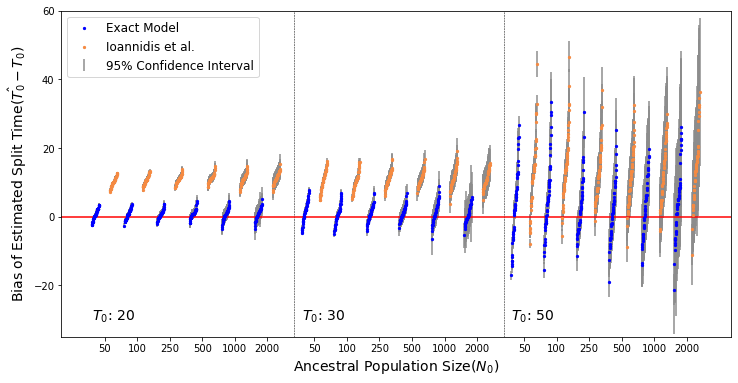

In [6]:
fig = plt.gcf()
fig.set_size_inches(12, 6)


global_start = 0
local_start = global_start    

xticks = []
for T in [20, 30, 50]:
    if T != 20:
        local_start += 20
        plt.axvline(local_start-10, 0, 1, color='k', linestyle='--', linewidth=0.5)
    
    # add text to indicate simulated split time
    plt.text(local_start, -30, f'$T_0$: {T}', fontsize=14)

    for i, Ne in enumerate([50, 100, 250, 500, 1000, 2000]):
        exp_t_mle, exp_t_se, twoIsland_t_mle, twoIsland_t_se = read_split_time_est(f'./results/T{T}_N{Ne}_end1000_fullARG.n15.results')
        exp_t_mle -= T
        twoIsland_t_mle -= T

        xs_2island = np.linspace(local_start, local_start+10, num=len(twoIsland_t_mle))
        xticks.append(local_start + (10+25)/2)

        if i > 0 or T != 20:
            plt.scatter(xs_2island, twoIsland_t_mle, marker='o', c='blue', s=5, zorder=3)
            plt.errorbar(xs_2island, twoIsland_t_mle, yerr=1.96*np.array(twoIsland_t_se), fmt='none', ecolor='#8c8c8c', zorder=1)
        else:
            plt.scatter(xs_2island, twoIsland_t_mle, marker='o', c='blue', s=5, zorder=3, label='Exact Model')
            plt.errorbar(xs_2island, twoIsland_t_mle, yerr=1.96*np.array(twoIsland_t_se), fmt='none', ecolor='#8c8c8c', zorder=1, label='95% Confidence Interval')

        xs_exp = np.linspace(local_start+25, local_start+35, num=len(exp_t_mle))

        if i > 0 or T != 20:
            plt.scatter(xs_exp, exp_t_mle, marker='o', c='#f58a42', s=5, zorder=3)
        else:
            plt.scatter(xs_exp, exp_t_mle, marker='o', c='#f58a42', s=5, zorder=3, label='Ioannidis et al.')
        plt.errorbar(xs_exp, exp_t_mle, yerr=1.96*np.array(exp_t_se), fmt='none', ecolor='#8c8c8c', zorder=1)

        print(f'####### T: {T}, Ne: {Ne} ##########')
        print(f'bias of our estimator: {np.mean(twoIsland_t_mle)}')
        print(f'bias of their estimator: {np.mean(exp_t_mle)}')

        local_start += 45
    


plt.xticks(xticks, ['50', '100', '250', '500', '1000', '2000']*3)
plt.xlabel('Ancestral Population Size($N_0$)', fontsize=14)
plt.ylabel('Bias of Estimated Split Time($\hat{T_0}-T_0$)', fontsize=14)
plt.axhline(y=0, xmin=0, xmax=1, zorder=2, c='red', linestyle='-')
plt.legend(loc='upper left', fontsize='large')
plt.ylim((-35, 60))
plt.savefig(f'T_merged.n15.png', dpi=300)
plt.savefig(f'T_merged.n15.pdf')


In [ ]:
fig, axs = plt.subplots(2, 3, sharex=True, figsize=(12, 8), tight_layout=True)
plt.setp(axs, xticks=[3.75, 11.25, 18.75], xticklabels=["20", "30", "50"])
for index, N in enumerate([50, 100, 250, 500, 1000, 2000]):
    i = int(index/3)
    j = index - 3*i
    
    ne, ne_se = read_ne_est(f'./results/T20_N{N}_end1000_fullARG.results')
    #print(np.mean(ne))
    xs = np.linspace(2.5, 5, num=len(ne))
    axs[i,j].scatter(xs, ne, marker='o', c='blue', s=5, zorder=3, label='MLE $N_0$ from two-island fit')
    axs[i,j].errorbar(xs, ne, yerr=1.96*np.array(ne_se), fmt='none', ecolor='#8c8c8c', zorder=1, label='95% Confidence Interval')

    ne, ne_se = read_ne_est(f'./results/T30_N{N}_end1000_fullARG.results')
    xs = np.linspace(10, 12.5, num=len(ne))
    axs[i,j].scatter(xs, ne, marker='o', c='blue', s=5, zorder=3)
    axs[i,j].errorbar(xs, ne, yerr=1.96*np.array(ne_se), fmt='none', ecolor='#8c8c8c', zorder=1)

    ne, ne_se = read_ne_est(f'./results/T50_N{N}_end1000_fullARG.results')
    xs = np.linspace(17.5, 20, num=len(ne))
    axs[i,j].scatter(xs, ne, marker='o', c='blue', s=5, zorder=3)
    axs[i,j].errorbar(xs, ne, yerr=1.96*np.array(ne_se), fmt='none', ecolor='#8c8c8c', zorder=1)
    axs[i,j].axhline(y=N, xmin=0, xmax=1, zorder=2, c='red', linestyle='-', label="True $N_0$")
    axs[i,j].set_title(f'Simulated $N_0$: {int(N)}')
    if i == 0 and j == 0:
        axs[i,j].legend(loc="upper left", fontsize='medium')

fig.text(0.5, 0.0, 'Simulated $T_0$', ha='center', va='center', fontsize='xx-large')
fig.text(0.0, 0.5, 'Estimated $N_0$', ha='center', va='center', rotation='vertical', fontsize='xx-large')
plt.savefig('infNe.png', dpi=300, bbox_inches = "tight")
plt.savefig('infNe.pdf', bbox_inches = "tight")
